In [313]:
!pip install yfinance  
!pip install bs4    
!pip install nbformat
!pip install matplotlib

In [314]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [315]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [316]:
# The make_graph function has been modified to use Matplotlib for static graphs. Earlier, it used Plotly to generate interactive dashboards, which caused issues when uploading the notebook in the MARK assignment submission.
 
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

In [317]:
Tesla=yf.Ticker("TSLA")

In [318]:
tesla_data=Tesla.history(period="max")

In [319]:
tesla_data.reset_index(inplace=True)

In [320]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [321]:
html_data=requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm").text

In [322]:
soup=BeautifulSoup(html_data,"html.parser")

In [323]:
tesla_revenue=pd.DataFrame(columns=["Date","Revenue"])

In [324]:
for row in soup.find("tbody").find_all("tr"):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text
    tesla_revenue_data=pd.DataFrame({"Date":[date],"Revenue":[revenue]})
    tesla_revenue=pd.concat([tesla_revenue,tesla_revenue_data],ignore_index=True)

In [325]:
tesla_revenue.head()


,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


In [326]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace( r"[,|\$]","",regex=True)

In [327]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [328]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [329]:
GameStop=yf.Ticker("GME")

In [330]:
gme_data=GameStop.history(period="max")

In [331]:
gme_data.reset_index(inplace=True)

In [332]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [333]:
html_data_2=requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text

In [334]:
soup=BeautifulSoup(html_data_2,"html.parser")

In [335]:
gme_revenue=pd.DataFrame(columns=["Date","Revenue"])

In [336]:
for row in soup.find("tbody").find_all("tr"):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text
    df=pd.DataFrame({"Date":[date],"Revenue":[revenue]})
    gme_revenue=pd.concat([gme_revenue,df],ignore_index=True)

In [337]:
gme_revenue.head()

,Date,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"


In [338]:
gme_revenue["Revenue"]= gme_revenue["Revenue"].str.replace(r"[/|,$]","",regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue= gme_revenue[ gme_revenue["Revenue"]!=""]

In [339]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


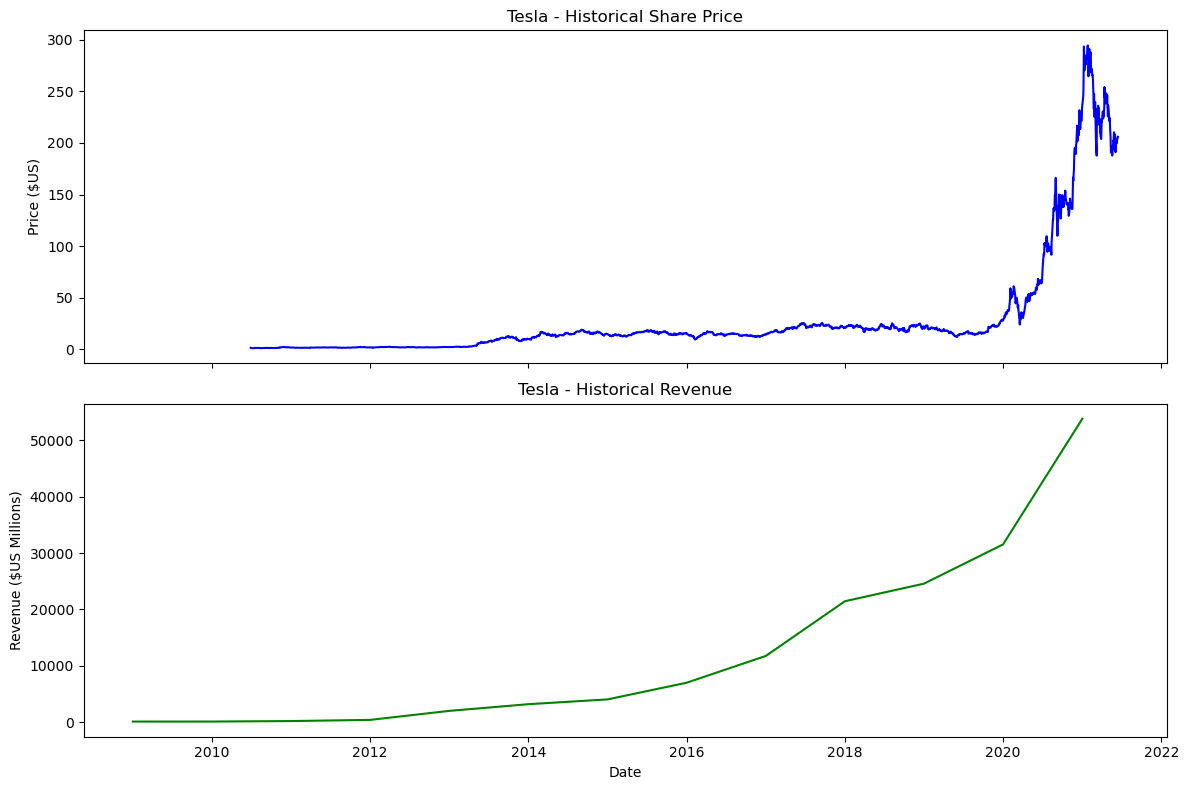

In [340]:

make_graph(tesla_data, tesla_revenue, 'Tesla')

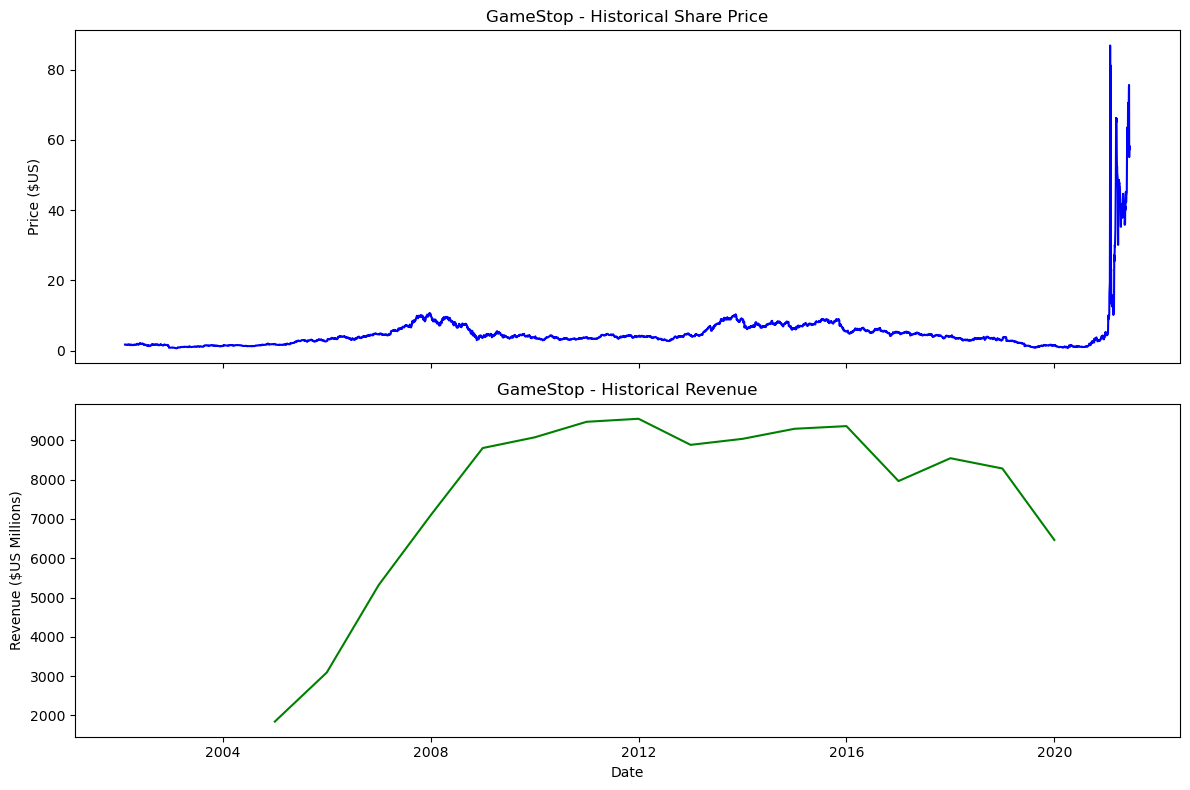

In [342]:
make_graph(gme_data, gme_revenue, 'GameStop')